<a href="https://colab.research.google.com/github/AnanthuMuralee/Plant_ML/blob/main/plant_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile

# Upload zip file
uploaded = files.upload()

# Extract zip file
for fn in uploaded.keys():
  with zipfile.ZipFile(fn, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Saving Plants.zip to Plants.zip


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import PIL

dataset_dir = '/content/Plants'

datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Freeze the base model layers
base_model.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(train_generator,
          epochs=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)




predictions = model.predict(test_generator)


class_labels = np.argmax(predictions, axis=1)

#Print the predictions
print("Predictions:", predictions)
print("Class labels:", class_labels)

for i in range(0,len(predictions)):
  if predictions[i][0] > predictions[i][1]:
    print("This is a P1")
  else:
    print("This is a P2")

Found 1003 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________
8/8 [===============

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2023-07-10 at 4.01.21 PM.jpeg to WhatsApp Image 2023-07-10 at 4.01.21 PM.jpeg
Saving io.jpeg to io.jpeg
Saving WhatsApp Image 2023-07-10 at 3.25.06 PM.jpeg to WhatsApp Image 2023-07-10 at 3.25.06 PM.jpeg
Saving Round1.jpeg to Round1.jpeg


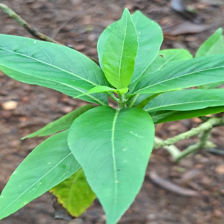

1/1 [==============================] - 1s 555ms/step
[[3.277689e-05 9.999672e-01]]
The predicted class is: Plant with lengthy leaf


In [ ]:
from PIL import Image
import numpy as np
# Open the image file
img = Image.open('plant4.jpeg')
# Resize the image to the same size as the training dataset
img = img.resize((224, 224))
# Convert the image to a numpy array
img_array = np.array(img)
img.show()
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)
# Make a prediction
predictions = model.predict(img_array)
print(predictions)
# Get the predicted class
predicted_class = np.argmax(predictions)
class_names = {0: 'Plant with round leaf', 1: 'Plant with lengthy leaf'}
# Print the predicted class name
print('The predicted class is:', class_names[predicted_class])